In [2]:
import pandas as pd
import numpy as np
import geohash
import re
import shapefile as shp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
import dateutil
from pytz import timezone
from geopy.distance import great_circle
from geopandas import GeoDataFrame
from tzwhere import tzwhere
import shapely
%matplotlib inline

In [3]:
from utils import *
from dbscan import *

In [4]:
df = pd.read_csv('../../data/geohash/top10_devices_data.csv')
df['timestamp'] = df['timestamp'] + '+00:00'

In [5]:
df['tz'] = df[['lat', 'long']].apply(lambda x: get_tz(x['lat'], x['long']), axis=1)
df['dt'] = df[['timestamp', 'tz']].apply(lambda x: adjust_tz(x['timestamp'], x['tz']),axis=1)
df['day'], df['month'], df['hour'], df['day_of_week'] = zip(*df['dt'].apply(get_dt_vars))

no tz
error adjusting tz


In [6]:
df['dt_fmt'] = df['dt'].apply(lambda x: str(x).split('.')[0])

In [9]:
#df.to_csv('../../data/geohash/top10_devices_data_processed.csv', index=False)

## Groupby device

In [67]:
count_df = pd.DataFrame(df.groupby('udid').apply(len)).reset_index()
count_df.columns = ['udid', 'N']

In [68]:
rank_df = df[['udid', 'rank']].drop_duplicates().sort_values(by='rank').reset_index()
pd.merge(rank_df, count_df, on='udid')

,index,udid,rank,N
0,629,7022a104-c709-4e82-b88e-3318c529e32e,1,5543
1,22,657ae5e1-a094-45d0-8731-f9af8af72493,2,13552
2,651,6c59c6db-34fa-4156-adec-8cef7811048a,3,3116
3,0,bfe92148-875b-4e49-b497-9ee3304dc6c8,4,6185
4,612,d4636720-833a-43f6-90f2-061bbd6fd070,5,3596
5,868,DC1A085E-FFB4-4528-A318-1BE453BDCE79,6,2642
6,14,73cb6a78-cf9c-4f07-aaeb-a964fbc457c9,7,3671
7,857,92B20754-C58A-4C2B-A0F7-F5236C3F6F36,8,3106
8,836,a84519ca-1c65-468a-bcf2-2b1b7af3544b,9,3642
9,833,49fe3d7e-328d-4402-ab00-d93e40523308,10,671


In [78]:
df1 = df[df['rank']==1]
df2 = df[(df['rank']==2) & (df['long']<-150)]
df3 = df[(df['rank']==3) & (df['long']>-99)]
df4 = df[df['rank']==4]
df5 = df[(df['rank']==5) & (df['long']<-121.5)]
df6 = df[df['rank']==6]
df7 = df[df['rank']==7]
df8 = df[(df['rank']==8) & (df['long']>-75)]
df9 = df[(df['rank']==9) & (df['long']<-85)]
df10 = df[(df['rank']==10) & (df['long']<-120)]

# Visualization

### Location of Devices

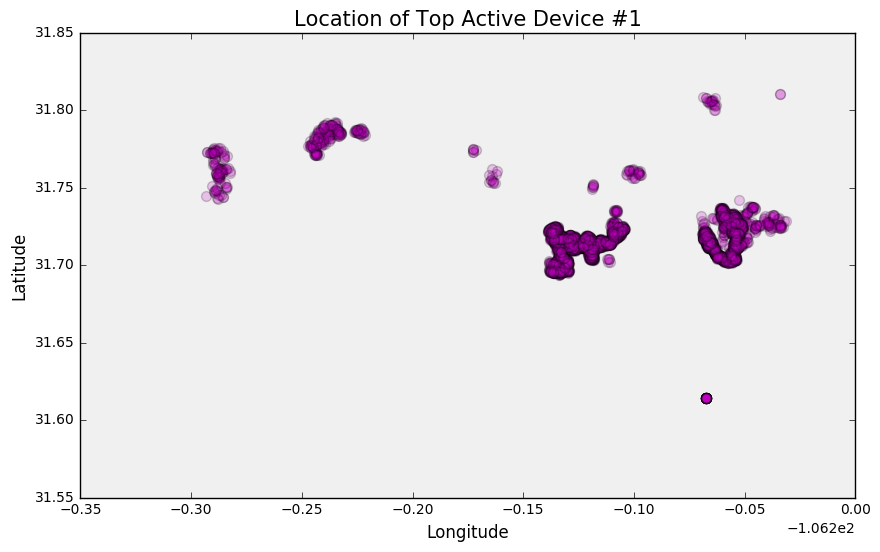

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df1['long'], df1['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device #1', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

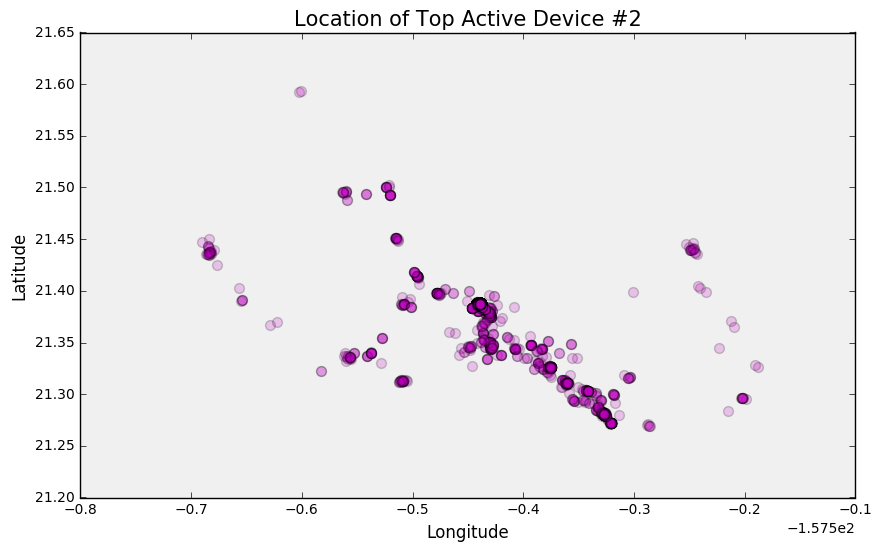

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df2['long'], df2['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device #2', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_xlim()
ax.set_axis_bgcolor(AXIS_BGCOLOR)

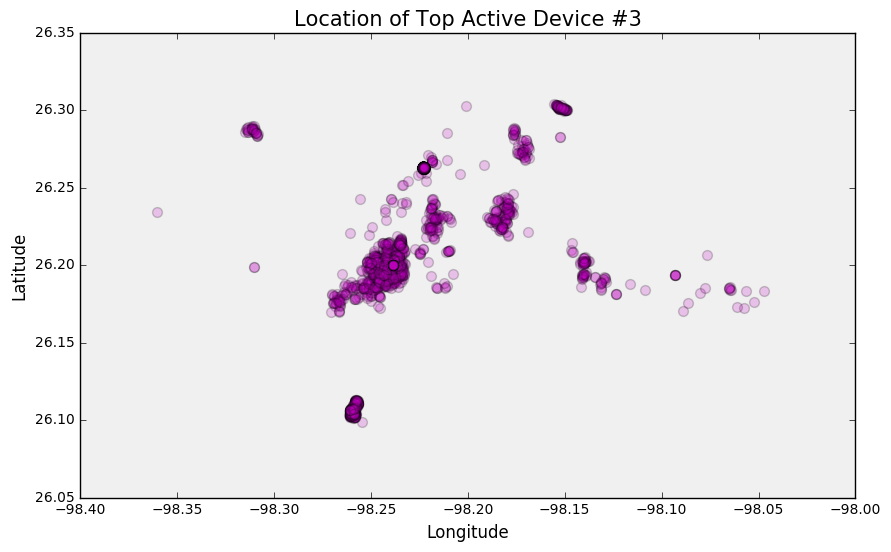

In [181]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df3['long'], df3['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device #3', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

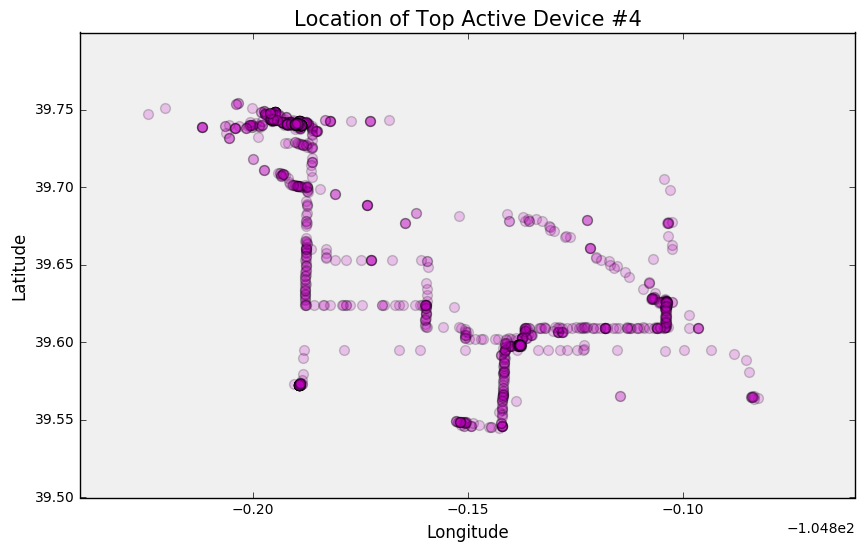

In [182]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df4['long'], df4['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device #4', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

In [43]:
day_df4 = df4[(df4.hour >=9) & (df4.hour <= 17) & (~df4['day'].isin(['Sat', 'Sun']))]
night_df4 = df4[(df4.hour >=20) | (df4.hour <=5) & (~df4['day'].isin(['Sat', 'Sun']))]

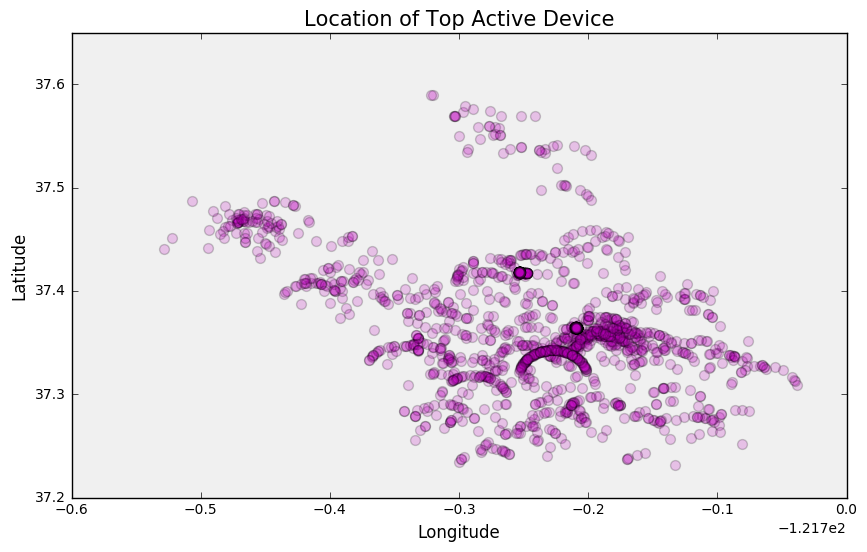

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df5['long'], df5['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

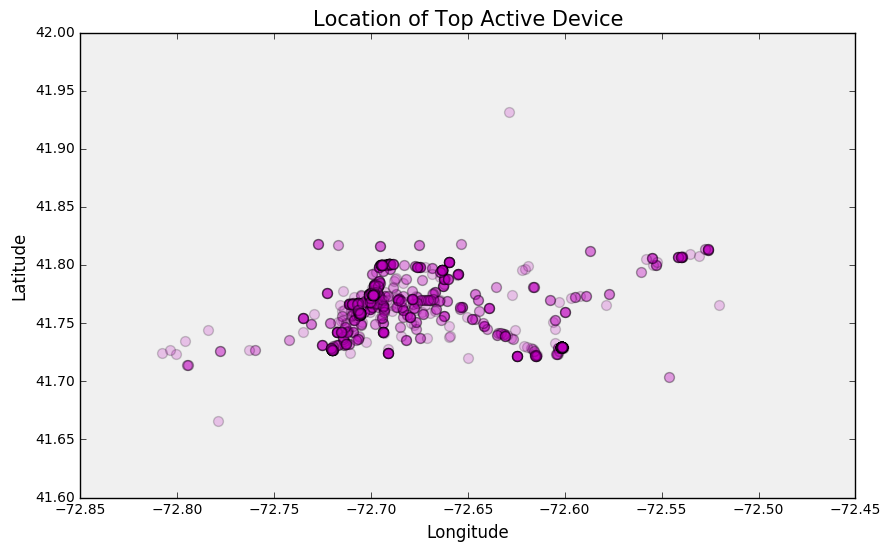

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df6['long'], df6['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

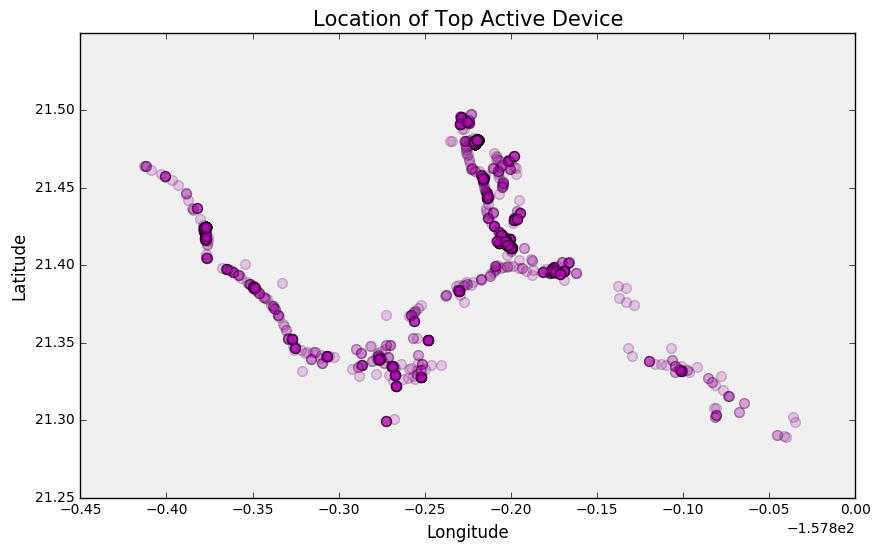

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df7['long'], df7['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

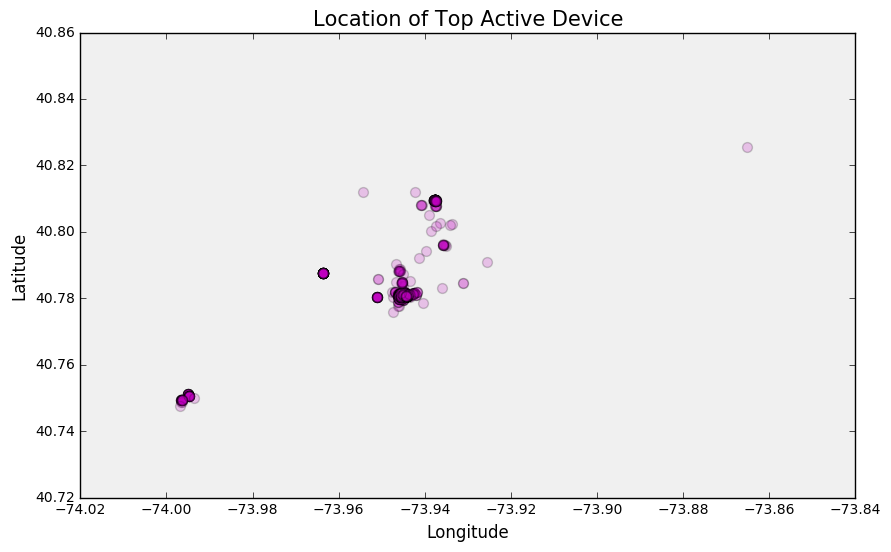

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df8['long'], df8['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

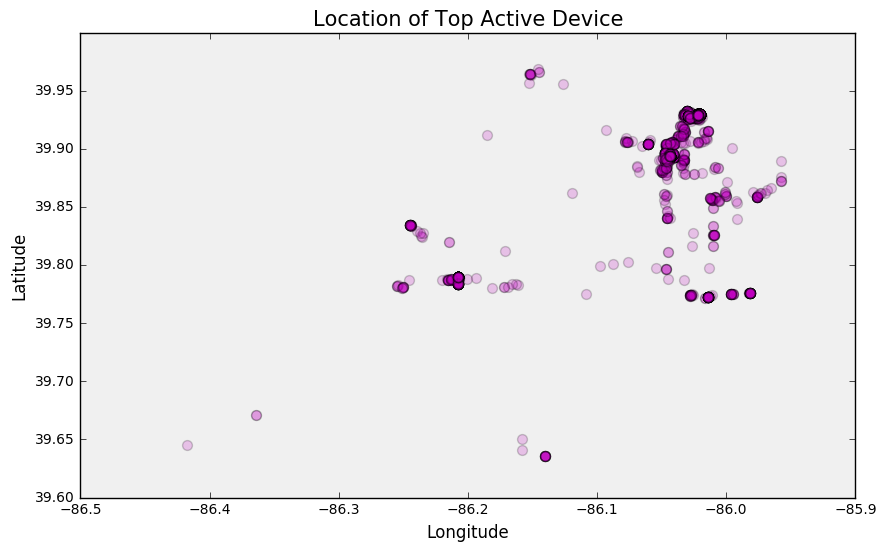

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df9['long'], df9['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

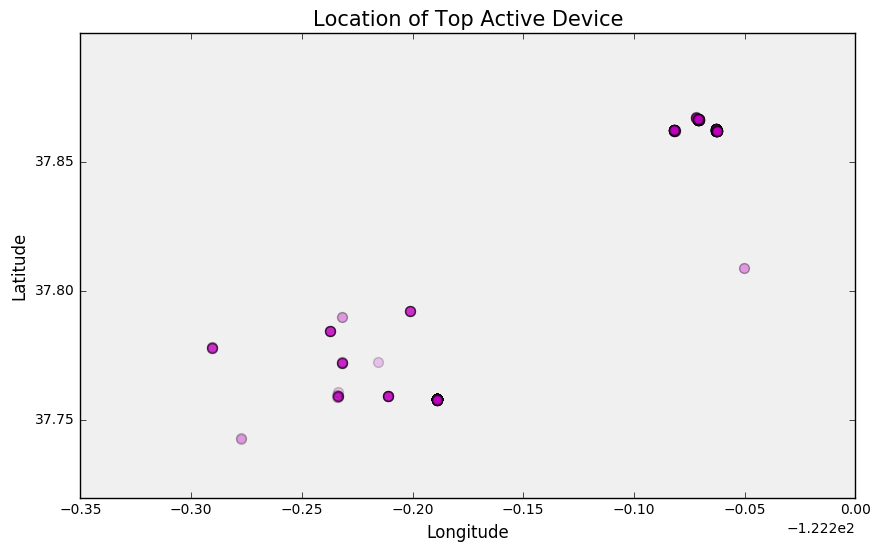

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(df10['long'], df10['lat'], c='m', edgecolor='k', alpha=.2, s=50)
#ax.scatter(df['long'].apply(lambda x: np.round(x,2)), df['lat'].apply(lambda x: np.round(x,2)))
ax.set_title('Location of Top Active Device', fontproperties=TITLE_FONT)
ax.set_xlabel('Longitude', fontproperties=LABEL_FONT)
ax.set_ylabel('Latitude', fontproperties=LABEL_FONT)
ax.set_axis_bgcolor(AXIS_BGCOLOR)

In [84]:
def hourly_plot(df):
    hours = sorted(df.hour.unique())
    N = len(hours)
    colors = cm.Spectral(np.linspace(0, 1, N))
   
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 1)
    for idx, hour in enumerate(hours):
        ax.scatter(hour, 0, color=colors[idx])
    ax.set_ylim(-0.005, 0.005)
    ax.set_xlim(-1, 24)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    hour_grp = df.groupby('hour')
    i=0
    for hour, group_df in hour_grp:
        ax.scatter(group_df['long'], group_df['lat'], color=colors[i])
        i+=1

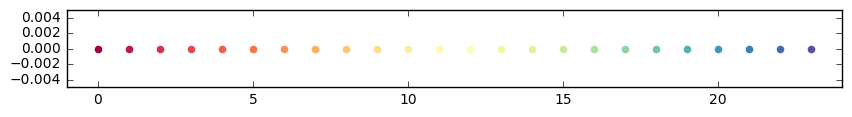

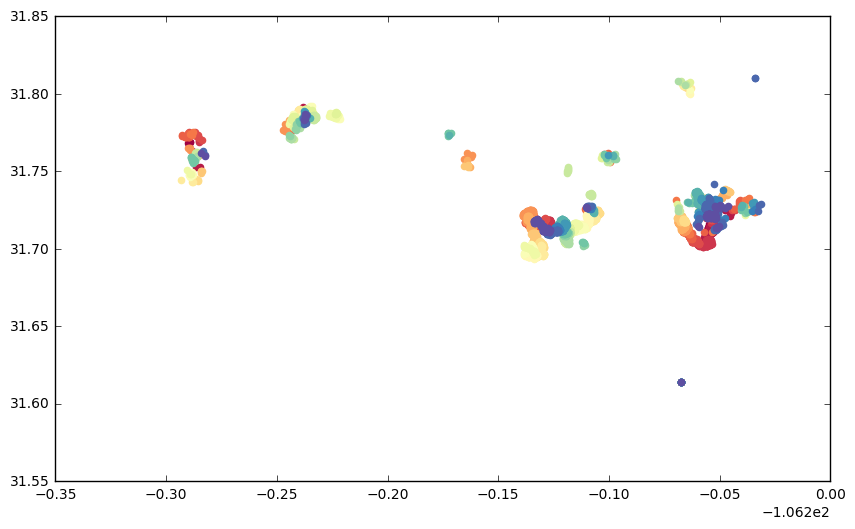

In [85]:
hourly_plot(df1)

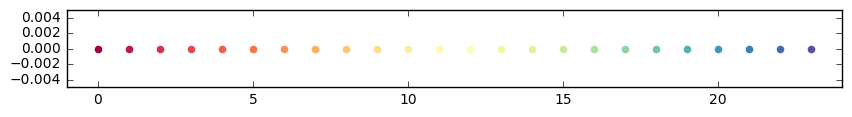

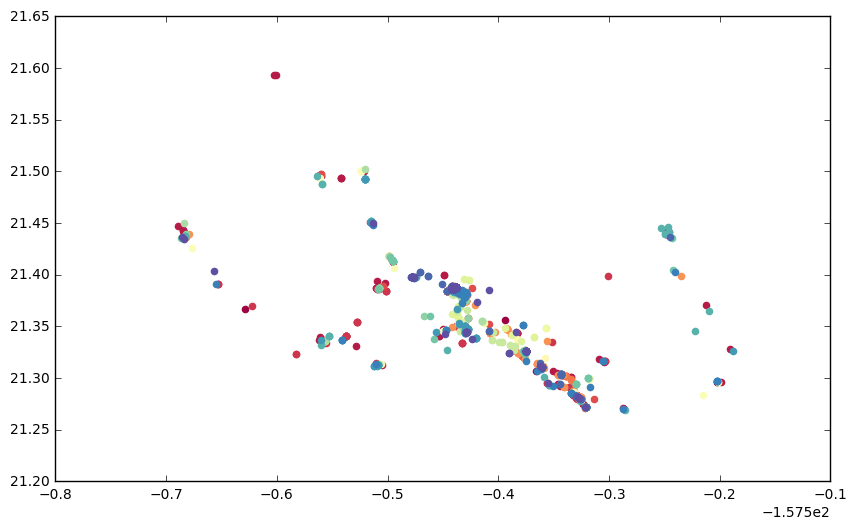

In [135]:
hourly_plot(df2)

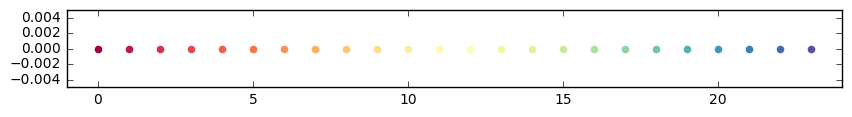

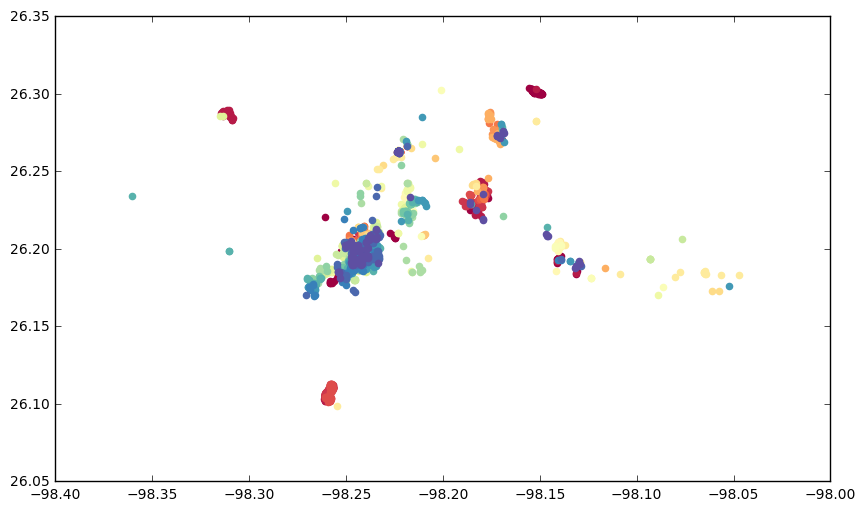

In [166]:
hourly_plot(df3)

In [178]:
df4.head()

,udid,timestamp,day,lat,long,region,country,geohash9,tz,geohash9_count,rank,dt,month,hour,day_of_week
0,bfe92148-875b-4e49-b497-9ee3304dc6c8,2016-10-28 13:29:44.895000+00:00,28,39.7416,-104.99095,CO,usa,9xj64fezt,America/Denver,797,4,2016-10-28 07:29:44.895000-06:00,10,7,Fri
1,bfe92148-875b-4e49-b497-9ee3304dc6c8,2016-10-28 20:02:31.529000+00:00,28,39.7416,-104.99095,CO,usa,9xj64fezt,America/Denver,797,4,2016-10-28 14:02:31.529000-06:00,10,14,Fri
2,bfe92148-875b-4e49-b497-9ee3304dc6c8,2016-10-28 20:03:15.096000+00:00,28,39.7416,-104.99095,CO,usa,9xj64fezt,America/Denver,797,4,2016-10-28 14:03:15.096000-06:00,10,14,Fri
3,bfe92148-875b-4e49-b497-9ee3304dc6c8,2016-10-28 12:26:18.167000+00:00,28,39.7416,-104.99095,CO,usa,9xj64fezt,America/Denver,797,4,2016-10-28 06:26:18.167000-06:00,10,6,Fri
4,bfe92148-875b-4e49-b497-9ee3304dc6c8,2016-10-28 12:26:41.118000+00:00,28,39.7416,-104.99095,CO,usa,9xj64fezt,America/Denver,797,4,2016-10-28 06:26:41.118000-06:00,10,6,Fri


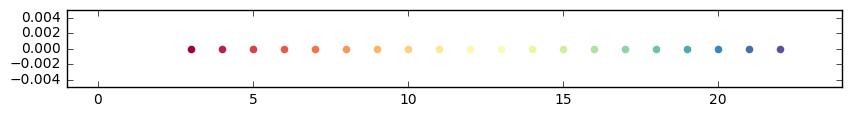

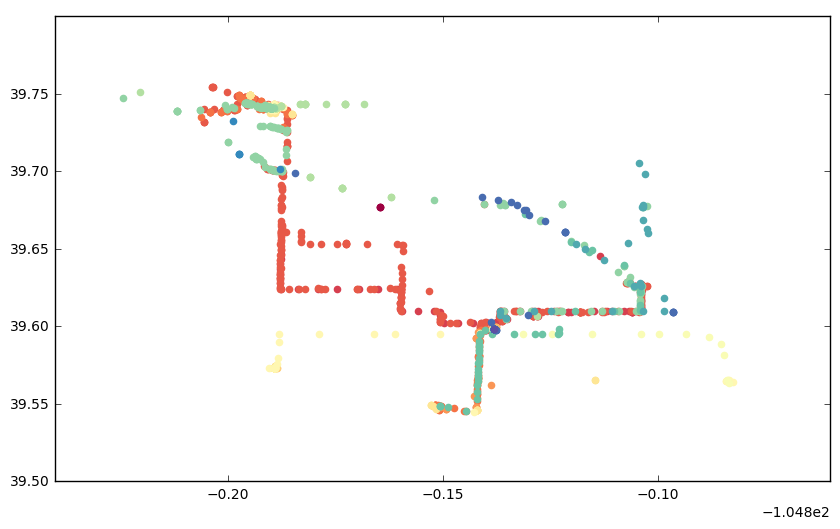

In [86]:
hourly_plot(df4)

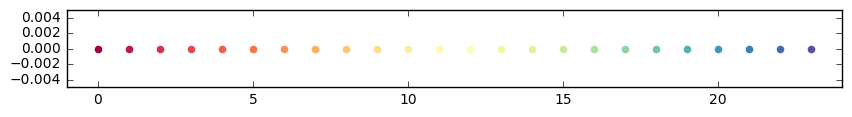

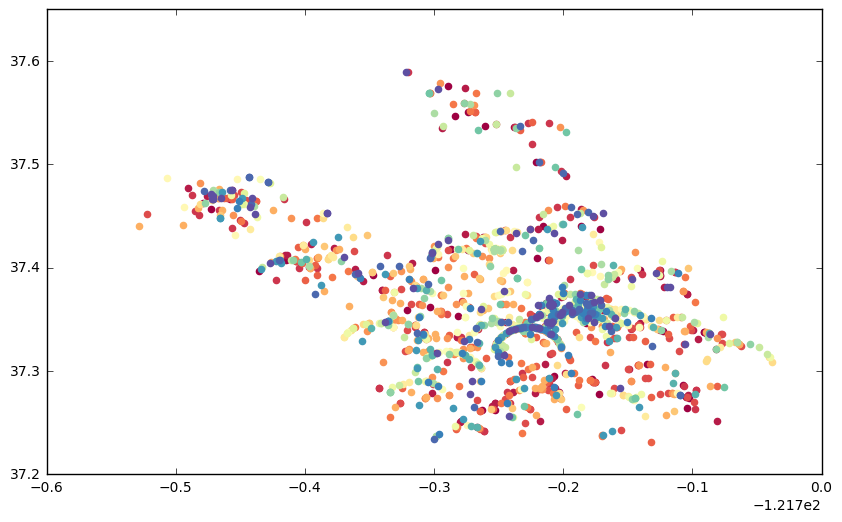

In [136]:
hourly_plot(df5)

In [143]:
max(df.lat)

45.529121000000004

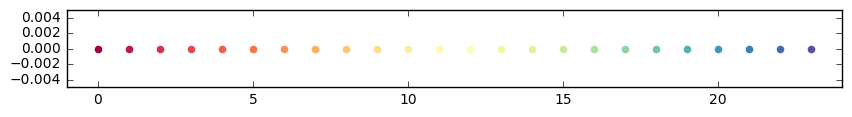

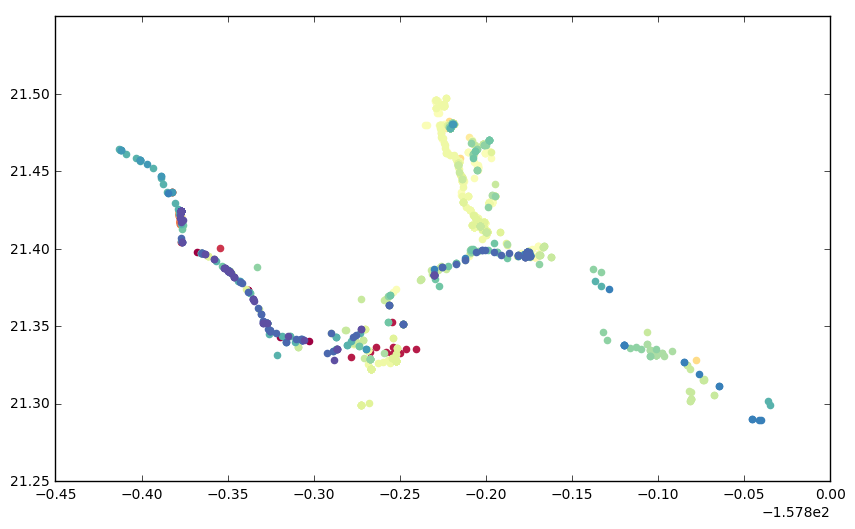

In [137]:
hourly_plot(df7)

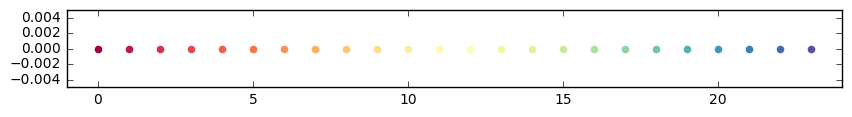

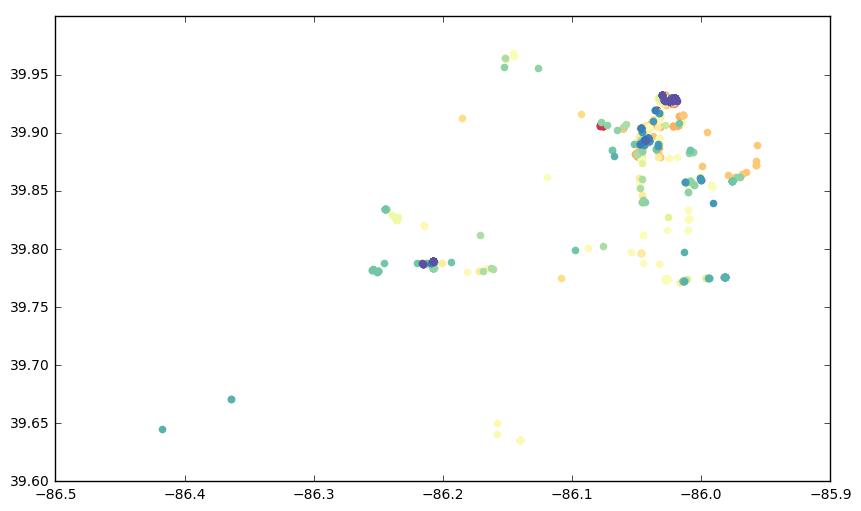

In [138]:
hourly_plot(df9)

In [89]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import DistanceMetric, NearestNeighbors

def dist2NN(X):
    '''
    Distance to Nearest Neighbor of precomputed distance matrix X
    '''
    return [sorted(row)[1] for row in X]

def pairwise_distance(X):
    df = pd.DataFrame(X).drop_duplicates()
    return df, squareform(pdist(df, lambda u,v: haversine(u,v)))

def count_elems_lt(array, threshold):
    return len([elem for elem in array if elem <= threshold])

def count_neighbors(X, epsilon):
    '''
    Count neighbors lying in point's epsilon-neighborhood
    '''
    return [count_elems_lt(row, epsilon) for row in X]

In [202]:
X = np.array(list(zip(df7['lat'], df7['long'])))
X_pairwise = squareform(pdist(X, lambda u,v: haversine(u,v)))
dist2nn = dist2NN(X_pairwise)

In [203]:
X_pairwise = squareform(pdist(X, lambda u,v: haversine(u,v)))
dist2nn = dist2NN(X_pairwise)

/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


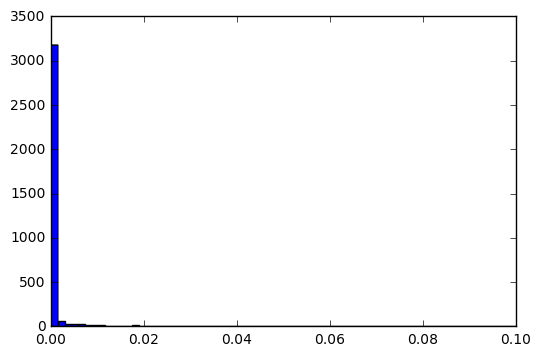

In [154]:
fig, ax = plt.subplots()
ax.hist(dist2nn, bins=1000)
ax.set_xlim(0,0.10)
fig.show()

/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


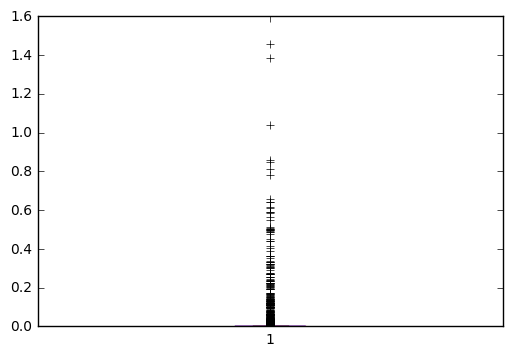

In [155]:
fig, ax = plt.subplots()
ax.boxplot(dist2nn)
fig.show()

In [156]:
neighbors_eps = count_neighbors(X_pairwise, 0.02)

/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


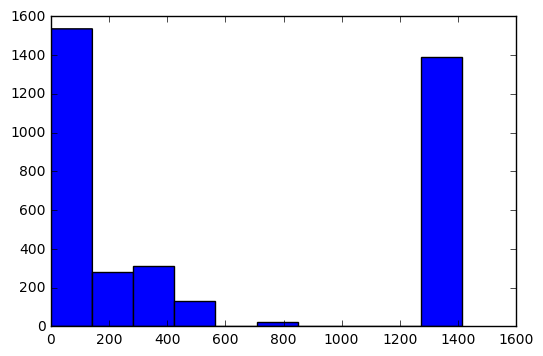

In [157]:
fig, ax = plt.subplots()
ax.hist(neighbors_eps)
fig.show()

In [200]:
def dbscan_grid_search(X, eps_search=[0.1], min_samples_search=[10]):
    results = []
    for e,n in itertools.product(eps_search, min_samples_search):
        try:
            db = DBSCAN(eps=e, min_samples=n, metric='haversine').fit(X)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            silhouette_coef = metrics.silhouette_score(X, labels)
            results.append((e,n,n_clusters_,silhouette_coef, db))
        except:
            #results.append((e,n,n_clusters_,None))
            results.append((e,n,n_clusters_,0,0)) #put 0 instead of None for result comparison
    return results

def find_best_result(results, idx=3):
    return max(results, key=itemgetter(idx))

In [201]:
eps_search = [0.005, 0.01, 0.015, 0.02]
min_samples_search = [5, 10, 25, 50, 100]

In [160]:
dbscan_results = dbscan_grid_search(X, eps_search, min_samples_search)

In [161]:
results_df = pd.DataFrame(dbscan_results)
results_df.columns = ['epsilon', 'min_pts', 'n_clusters', 'silhouette_score', 'db_obj']
print (('epsilon', 'min_pts', 'n_clusters', 'silhouette_score'))
for idx, row in results_df.iterrows():
    print ((row['epsilon'], row['min_pts'], row['n_clusters'], row['silhouette_score']))

('epsilon', 'min_pts', 'n_clusters', 'silhouette_score')
(0.005, 5, 22, 0.32635963221938)
(0.005, 10, 20, 0.7389220832981558)
(0.005, 25, 15, 0.729413132458849)
(0.005, 50, 6, 0.6400381663822295)
(0.005, 100, 3, 0.6249435657075628)
(0.01, 5, 8, 0.6828849704487086)
(0.01, 10, 8, 0.6558722138137957)
(0.01, 25, 7, 0.6390792010588732)
(0.01, 50, 6, 0.7634893871290683)
(0.01, 100, 4, 0.707612043783783)
(0.015, 5, 5, 0.15594167116081062)
(0.015, 10, 2, 0.45235916312884905)
(0.015, 25, 3, 0.725670271990825)
(0.015, 50, 5, 0.769352399495985)
(0.015, 100, 3, 0.7357882558485084)
(0.02, 5, 5, 0.15594167116081062)
(0.02, 10, 2, 0.45235916312884905)
(0.02, 25, 2, 0.4134271954640462)
(0.02, 50, 3, 0.7903685518050909)
(0.02, 100, 3, 0.7588107632765041)


In [162]:
db = find_best_result(dbscan_results)[4]
#db = dbscan_results[8][4]
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Silhouette Coefficient: 0.790


/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


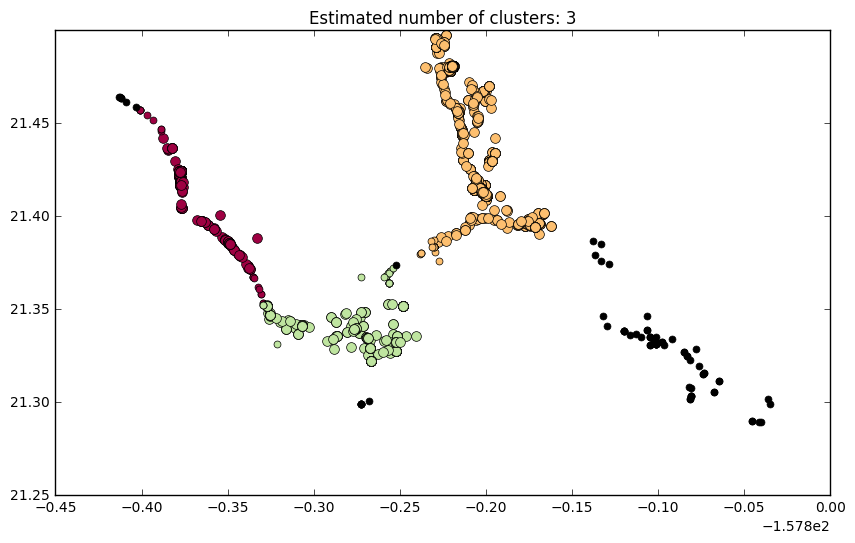

In [165]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=7)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [168]:
def fit_dbscan(X, eps_search=[0.005, 0.01, 0.015, 0.02], min_samples_search=[10,25,50,100,150]):
    dbscan_results = dbscan_grid_search(X, eps_search, min_samples_search)
    return dbscan_results

def print_dbscan_fit(dbscan_results):
    '''
    Print results of dbscan grid search
    '''
    results_df = pd.DataFrame(dbscan_results)
    results_df.columns = ['epsilon', 'min_pts', 'n_clusters', 'silhouette_score', 'db_obj']
    print (('epsilon', 'min_pts', 'n_clusters', 'silhouette_score'))
    for idx, row in results_df.iterrows():
        print ((row['epsilon'], row['min_pts'], row['n_clusters'], row['silhouette_score']))

def plot_dbscan(X, db):
    # Plot DBSCAN clustering results
    #eps, min_pts, n_clusters_, silhouette_score, db = find_best_result(dbscan_results)
    #db = dbscan_results[8][4]
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print ('epsilon: %f, min_pts: %d' % (eps,min_pts))
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=7)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=5)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [169]:
X = np.array(list(zip(df2['lat'], df2['long'])))

In [172]:
eps_search=[0.005, 0.01, 0.015, 0.02]
min_samples_search=[10,25,50,100,150]

In [173]:
dbscan_results = dbscan_grid_search(X, eps_search, min_samples_search)

('epsilon', 'min_pts', 'n_clusters', 'silhouette_score')
(0.005, 10, 21, 0.9332040921784752)
(0.005, 25, 9, 0.9168941279341186)
(0.005, 50, 5, 0.9086726240865333)
(0.005, 100, 2, 0.902370840803687)
(0.005, 150, 2, 0.9018520477091242)
(0.01, 10, 12, 0.9296850862451725)
(0.01, 25, 5, 0.9158440478282773)
(0.01, 50, 4, 0.9156665427322385)
(0.01, 100, 2, 0.9162956773687935)
(0.01, 150, 2, 0.9158899564942715)
(0.015, 10, 10, 0.8552169519054748)
(0.015, 25, 4, 0.8505854446500013)
(0.015, 50, 2, 0.9430307106091341)
(0.015, 100, 2, 0.9357148673390558)
(0.015, 150, 3, 0.9321406584994028)
(0.02, 10, 8, 0.8793948111025032)
(0.02, 25, 4, 0.9007386226228357)
(0.02, 50, 2, 0.8278208664384699)
(0.02, 100, 1, 0.9043588911506151)
(0.02, 150, 2, 0.9402453141801774)
epsilon: 0.015000, min_pts: 50


/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


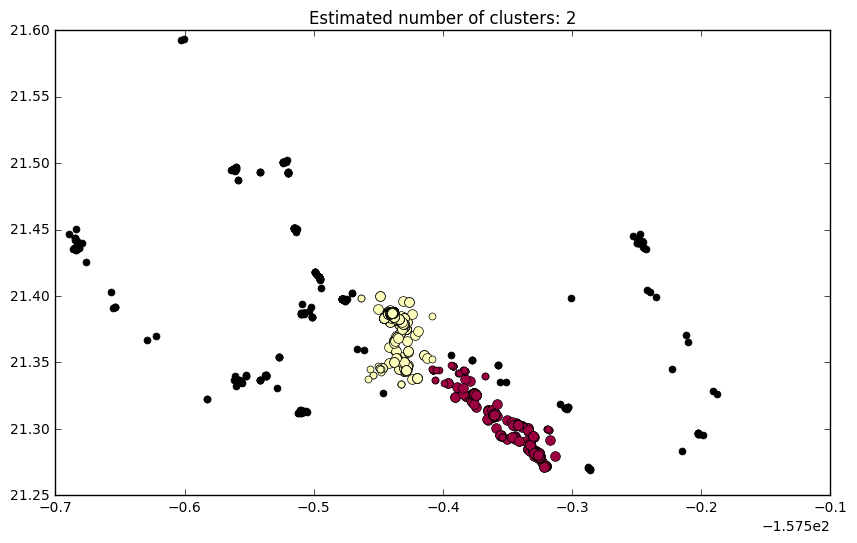

In [174]:
    results_df = pd.DataFrame(dbscan_results)
    results_df.columns = ['epsilon', 'min_pts', 'n_clusters', 'silhouette_score', 'db_obj']
    print (('epsilon', 'min_pts', 'n_clusters', 'silhouette_score'))
    for idx, row in results_df.iterrows():
        print ((row['epsilon'], row['min_pts'], row['n_clusters'], row['silhouette_score']))

    # Plot DBSCAN clustering results
    eps, min_pts, n_clusters_, silhouette_score, db = find_best_result(dbscan_results)
    #db = dbscan_results[8][4]
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print ('epsilon: %f, min_pts: %d' % (eps,min_pts))
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=7)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=5)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [189]:
str(df4.ix[0, 'dt'])

'2016-10-28 07:29:44.895000-06:00'

In [196]:
df7.to_csv('df7.csv', index=False)

In [195]:
df7['dt_fmt'] = df7['dt'].apply(lambda x: str(x).split('.')[0])

/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [191]:
df4['dt_fmt'] = df4['dt'].apply(lambda x: str(x).split('.')[0])

/Users/johnmin/src/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [176]:
labels[100:104]

array([1, 1, 1, 1])

In [ ]:
def detect_outliers(df):
    '''
    compute median lat/long
    threshold distance
    return index of outlier points
    
    '''